<a href="https://colab.research.google.com/github/Sagaust/AfricanDH/blob/main/Philosophy_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

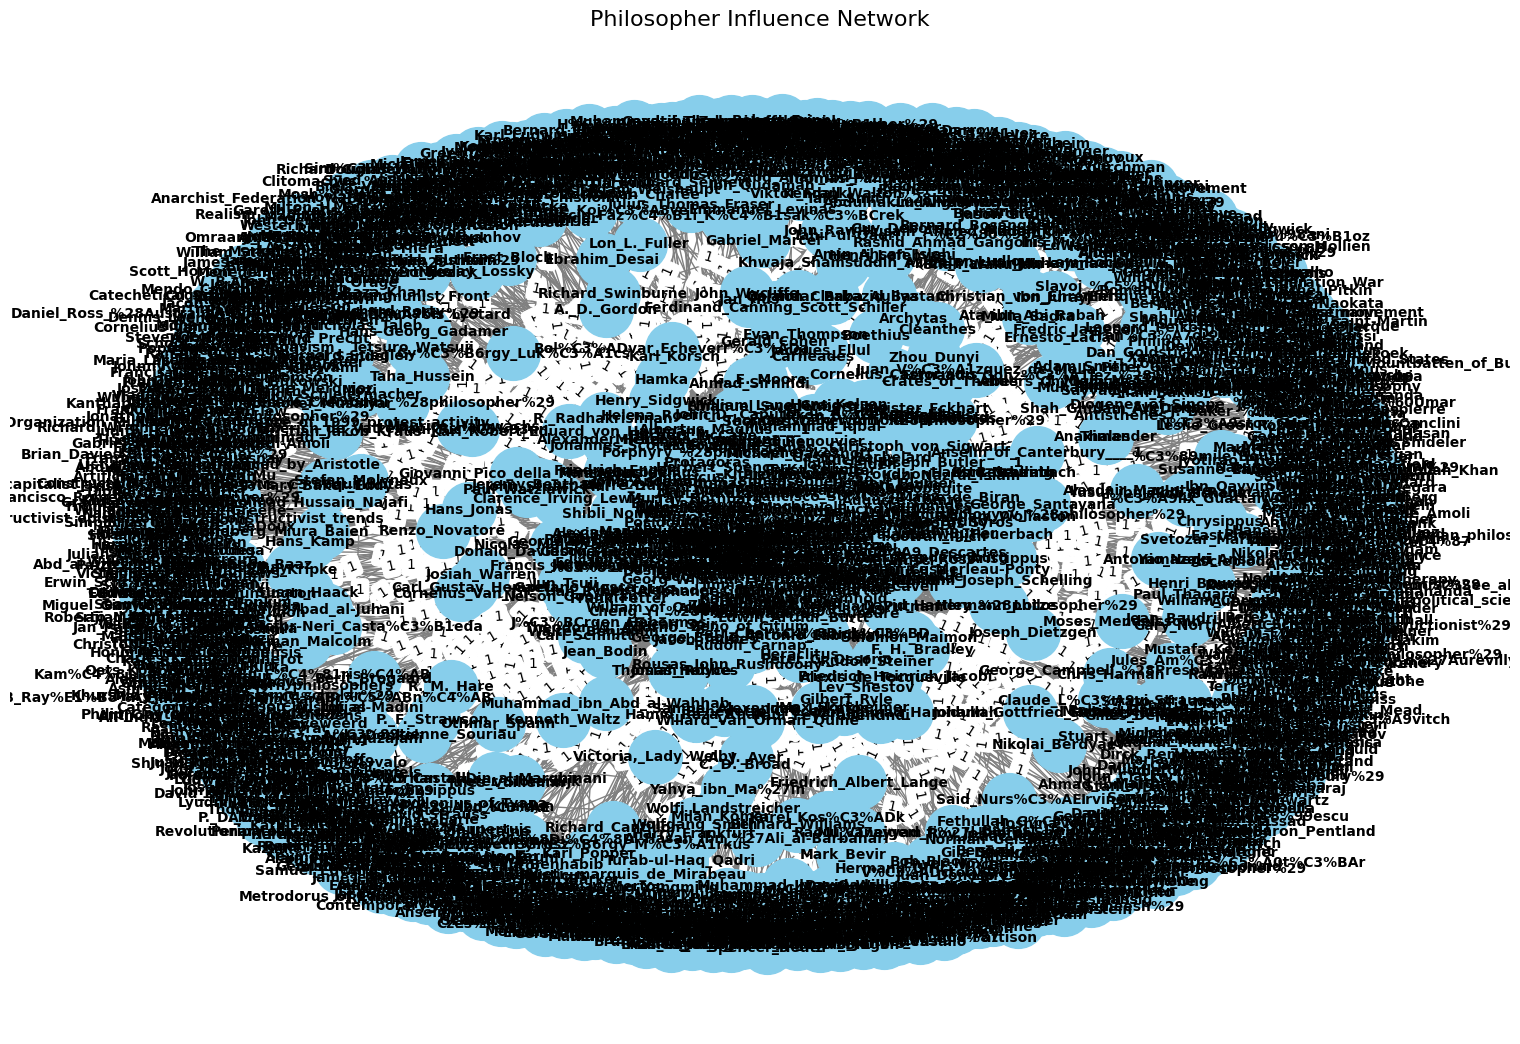

In [ ]:
# Install required libraries
!pip install networkx matplotlib

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/Phil.csv'  # Update the path if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Create the directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in data.iterrows():
    G.add_edge(row['A'].strip(), row['B'].strip(), weight=row['Weight'])

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # Positioning the nodes
nx.draw(
    G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', font_size=10, font_weight='bold'
)

# Add edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Philosopher Influence Network", fontsize=16)
plt.show()


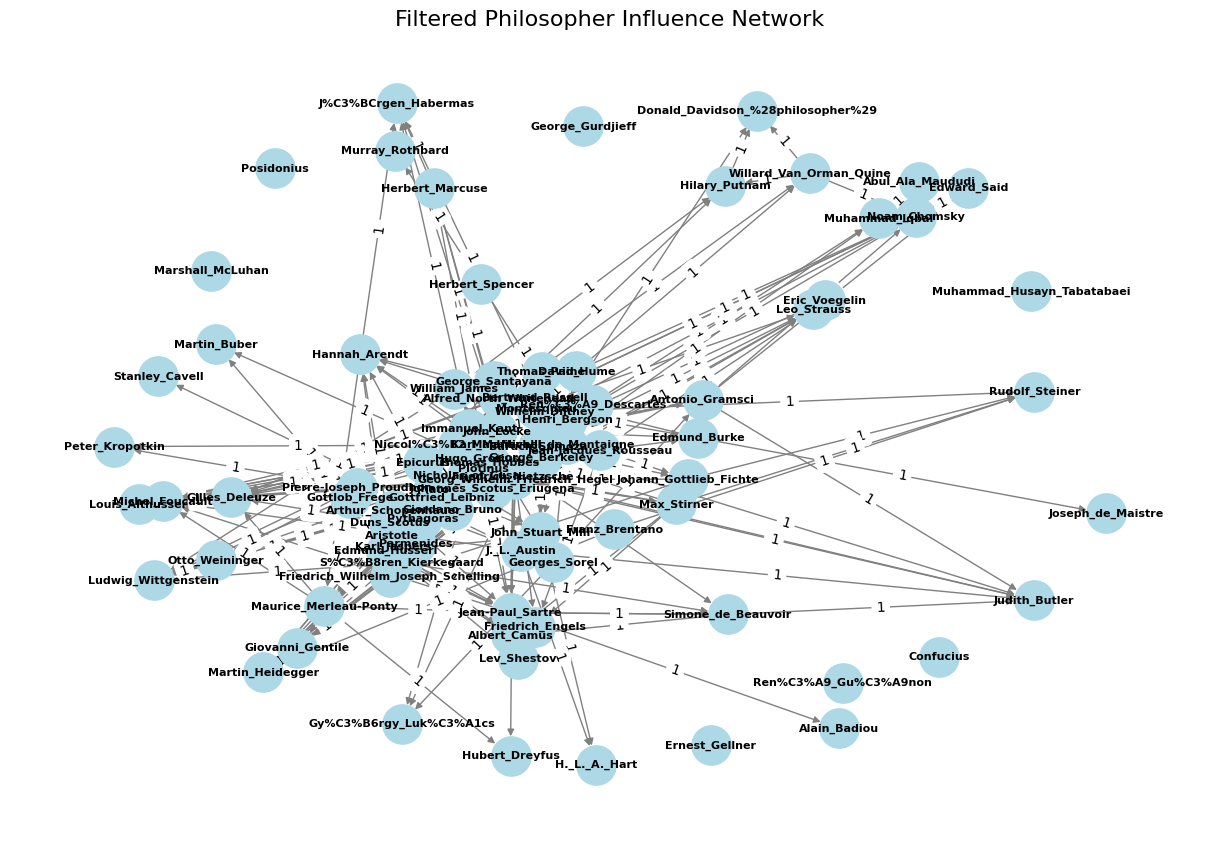

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/Phil.csv'  # Update the path if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Create the directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in data.iterrows():
    G.add_edge(row['A'].strip(), row['B'].strip(), weight=row['Weight'])

# Filter the graph for highly connected nodes
degree_threshold = 10  # Adjust as needed
filtered_nodes = [node for node, degree in dict(G.degree()).items() if degree >= degree_threshold]
H = G.subgraph(filtered_nodes)

# Draw the filtered graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(H, seed=42)
nx.draw(
    H, pos, with_labels=True, node_color='lightblue', node_size=800, edge_color='gray', font_size=8, font_weight='bold'
)

# Add edge weights
edge_labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)

plt.title("Filtered Philosopher Influence Network", fontsize=16)
plt.show()


In [ ]:
pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [ ]:
from pyvis.network import Network
import pandas as pd

# Load the dataset
file_path = '/content/Phil.csv'  # Update the path if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Initialize the Pyvis network
net = Network(height='750px', width='100%', notebook=True, directed=True)

# Add nodes and edges to the network
for index, row in data.iterrows():
    net.add_node(row['A'].strip(), label=row['A'].strip())  # Add node for philosopher A
    net.add_node(row['B'].strip(), label=row['B'].strip())  # Add node for philosopher B
    net.add_edge(row['A'].strip(), row['B'].strip(), weight=row['Weight'])  # Add edge

# Apply physics for better node arrangement
net.toggle_physics(True)

# Save and display the interactive network
net.show('philosopher_influence_network.html')


philosopher_influence_network.html


In [ ]:
from pyvis.network import Network
import pandas as pd
import random

# Load the dataset
file_path = '/content/Phil.csv'  # Update the path if necessary
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Initialize the Pyvis network
net = Network(height='750px', width='100%', notebook=True, directed=True)

# Generate random colors for edges based on weight
def generate_color(weight):
    if weight >= 3:
        return 'red'
    elif weight == 2:
        return 'blue'
    else:
        return 'green'

# Add nodes and edges with customized properties
for index, row in data.iterrows():
    source = row['A'].strip()
    target = row['B'].strip()
    weight = row['Weight']

    # Add nodes with unique shapes for clarity
    net.add_node(source, label=source, color='lightblue', shape='ellipse')
    net.add_node(target, label=target, color='orange', shape='dot')

    # Add edges with varying thickness and colors based on weight
    net.add_edge(source, target, value=weight, color=generate_color(weight), title=f'Weight: {weight}')

# Enable physics for better spacing
net.toggle_physics(True)

# Customizations for better interactivity
net.set_options("""
var options = {
  "nodes": {
    "shape": "dot",
    "size": 15,
    "font": {
      "size": 20
    },
    "borderWidth": 2,
    "shadow": true
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": {
      "type": "continuous"
    }
  },
  "interaction": {
    "hover": true,
    "multiselect": true,
    "dragNodes": true,
    "dragView": true,
    "zoomView": true,
    "navigationButtons": true
  },
  "physics": {
    "enabled": true,
    "stabilization": {
      "iterations": 200
    }
  }
}
""")

# Save and display the network
net.show('enhanced_philosopher_network.html')


enhanced_philosopher_network.html


In [ ]:
# Initialize the Pyvis network
net = Network(height="750px", width="100%", directed=True, notebook=True)

# Function to add a node if it doesn't already exist
def safe_add_node(graph, node, size=10, color="blue", title=""):
    if node not in graph.get_nodes():
        graph.add_node(node, label=node, size=size, color=color, title=title)

# Add nodes and edges to the network
for index, row in data.iterrows():
    source = row['A'].strip()
    target = row['B'].strip()
    weight = row['Weight']

    # Add the source and target nodes if they don’t exist
    safe_add_node(net, source, size=15, color="lightblue", title=f"Philosopher: {source}")
    safe_add_node(net, target, size=10, color="orange", title=f"Philosopher: {target}")

    # Add the edge with appropriate weight and tooltip
    net.add_edge(source, target, value=weight, title=f"Weight: {weight}", width=int(weight))

# Save and display the network
net.show("philosopher_network.html")


philosopher_network.html


In [ ]:
# Write philosophers' connections data to "connections.csv"
write.csv(philosophers, file = "connections.csv", row.names = FALSE)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-7-275b6893f99e>, line 2)

In [ ]:
# Write philosophers' classification data to "elements.csv"
write.csv(elements, file = "elements.csv", row.names = FALSE)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-8-b7b89a3f9d2e>, line 2)